In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [55]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfBTCActual = pd.read_csv('./data/BTC-USD.csv')
dfBTC = pd.read_csv('./data/btc-usd-max.csv')
dfBTC.drop(["market_cap", "total_volume"], axis=1, inplace=True)
dfBTC['price'].fillna(method='ffill', inplace=True)
dfBTC.columns = ['ds','y']
# log data for btc
# dfBTC['y'] = np.log(dfBTC['y'])
# dfBTC['y'].iplot();

In [3]:
# exp(log) = x so the orginal data  data for btc
#dfBTC['y'] = np.exp(dfBTC['y'])
dfBTC['y'].iplot();

In [4]:
# log data for btc
#dfBTC['y'] = np.log(dfBTC['y'])

In [5]:
dfBTC['ds'] = pd.to_datetime(dfBTC['ds'])
dfBTC['ds'] = dfBTC['ds'].dt.tz_localize(None)

In [6]:
dfBTC.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [7]:
dfBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3432 non-null   datetime64[ns]
 1   y       3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [8]:
train = dfBTC.iloc[:-60]
test = dfBTC.iloc[-60:]

In [9]:
# This is fitting only on the training data
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=60,freq = 'D')

# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,4.983273,-1817.791453,1934.766365,4.983273,4.983273,5.816182,5.816182,5.816182,5.185035,...,10.013875,10.013875,10.013875,-0.987343,-0.987343,-0.987343,0.0,0.0,0.0,54.885138
1,2013-04-29,5.101908,-1729.394312,1937.782826,5.101908,5.101908,5.770300,5.770300,5.770300,5.185035,...,9.933666,9.933666,9.933666,-1.021669,-1.021669,-1.021669,0.0,0.0,0.0,55.782556
2,2013-04-30,5.220543,-1837.560430,1938.213199,5.220543,5.220543,5.721839,5.721839,5.721839,5.185035,...,9.849289,9.849289,9.849289,-1.057585,-1.057585,-1.057585,0.0,0.0,0.0,56.639179
3,2013-05-01,5.339178,-1856.625377,1877.458998,5.339178,5.339178,5.670827,5.670827,5.670827,5.185035,...,9.760651,9.760651,9.760651,-1.095211,-1.095211,-1.095211,0.0,0.0,0.0,57.453034
4,2013-05-02,5.457814,-1777.718503,1925.276510,5.457814,5.457814,5.617292,5.617292,5.617292,5.185035,...,9.667745,9.667745,9.667745,-1.134582,-1.134582,-1.134582,0.0,0.0,0.0,58.222564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,2022-09-17,10601.969352,24652.992279,28448.854922,10572.052236,10628.089681,-3.552896,-3.552896,-3.552896,5.185035,...,1.493795,1.493795,1.493795,-0.138344,-0.138344,-0.138344,0.0,0.0,0.0,26439.140113
3428,2022-09-18,10613.050998,24062.898880,27761.997927,10581.347948,10639.850901,-3.498138,-3.498138,-3.498138,5.185035,...,1.437848,1.437848,1.437848,-0.249049,-0.249049,-0.249049,0.0,0.0,0.0,25873.003560
3429,2022-09-19,10624.132643,23484.928964,27122.050254,10590.034641,10652.313282,-3.443391,-3.443391,-3.443391,5.185035,...,1.386492,1.386492,1.386492,-0.355152,-0.355152,-0.355152,0.0,0.0,0.0,25354.409967
3430,2022-09-20,10635.214289,22867.839961,26714.702364,10599.144622,10664.035915,-3.388723,-3.388723,-3.388723,5.185035,...,1.340338,1.340338,1.340338,-0.455974,-0.455974,-0.455974,0.0,0.0,0.0,24889.991202


<AxesSubplot:xlabel='ds'>

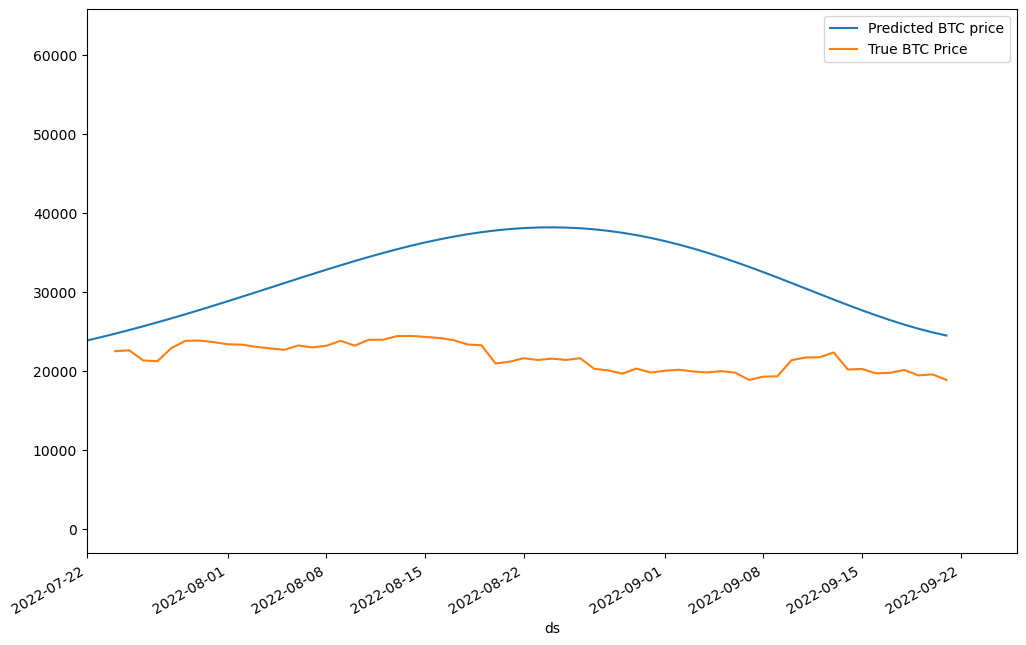

In [18]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax, xlim=('2022-07-22','2022-9-26'))

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
predictions = forecast.iloc[-60:]['yhat']

In [24]:
rmse(predictions,test['y'])

11689.477823253466

In [26]:
# still large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_5996\2331986829.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    21690.904681
dtype: float64

In [27]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [28]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [29]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:prophet:Making 4 forecasts with cutoffs between 2018-07-24 00:00:00 and 2021-07-23 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [30]:
# thgis is the raw dataset that is returned via the above
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,2.050702e+07,4528.467418,3360.920371,0.376368,0.218980,0.286146,0.154110
1,38 days,2.149318e+07,4636.073561,3482.446352,0.389669,0.225376,0.295697,0.143836
2,39 days,2.261204e+07,4755.211618,3621.236161,0.403684,0.226301,0.306117,0.130137
3,40 days,2.369367e+07,4867.614627,3752.156564,0.417024,0.228308,0.316320,0.119863
4,41 days,2.466327e+07,4966.213066,3866.168969,0.429564,0.230513,0.326140,0.113014
...,...,...,...,...,...,...,...,...
324,361 days,1.168780e+09,34187.425668,29163.623020,1.680845,1.546043,1.334872,0.000000
325,362 days,1.163940e+09,34116.562454,29087.912597,1.675389,1.541247,1.333604,0.000000
326,363 days,1.156217e+09,34003.184870,28978.119731,1.668853,1.536581,1.331857,0.000000
327,364 days,1.149479e+09,33903.970745,28888.300625,1.663391,1.546043,1.330679,0.000000


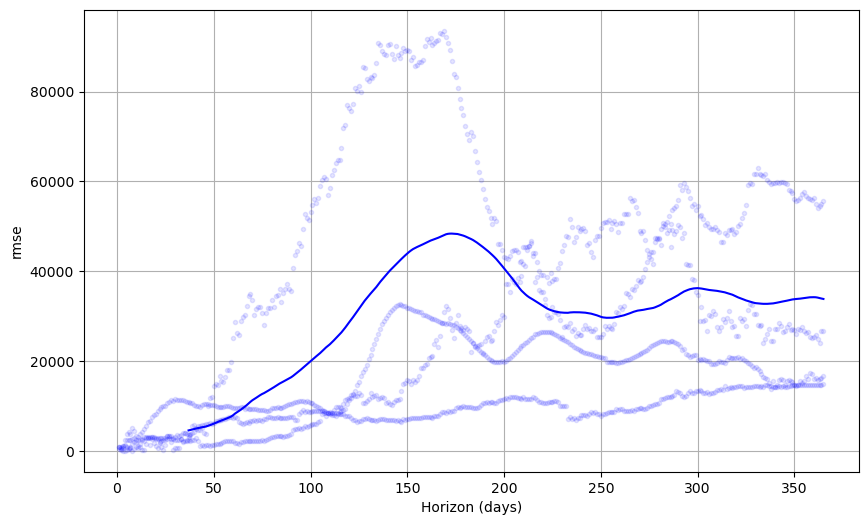

In [31]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
plot_cross_validation_metric(df_cv, metric='rmse');

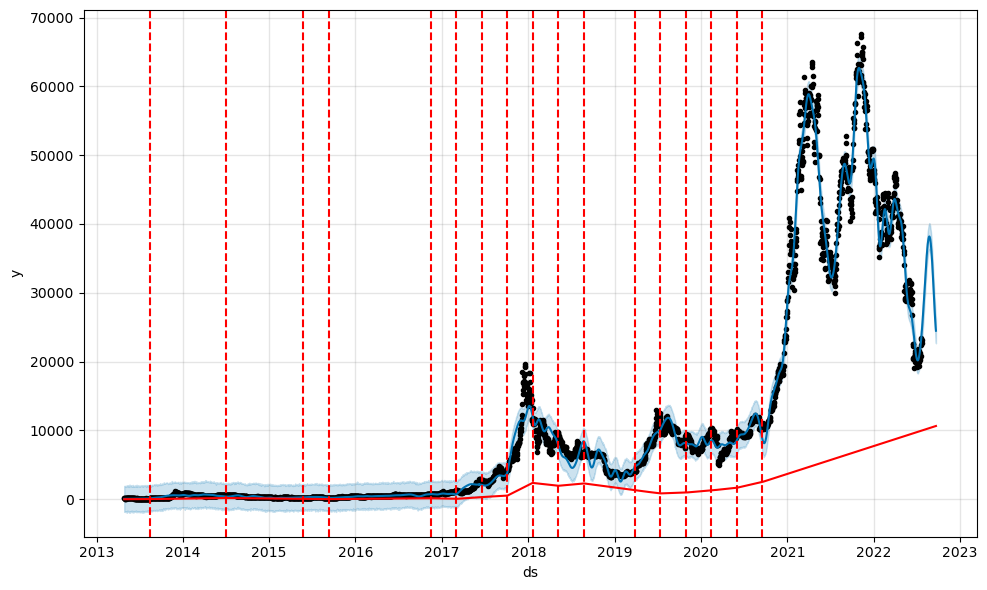

In [32]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [33]:
# forecast functionality of prophet with matplotlib that can run on the m object of the prophet model
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,4.983273,-1817.791453,1934.766365,4.983273,4.983273,5.816182,5.816182,5.816182,5.185035,...,10.013875,10.013875,10.013875,-0.987343,-0.987343,-0.987343,0.0,0.0,0.0,54.885138
1,2013-04-29,5.101908,-1729.394312,1937.782826,5.101908,5.101908,5.770300,5.770300,5.770300,5.185035,...,9.933666,9.933666,9.933666,-1.021669,-1.021669,-1.021669,0.0,0.0,0.0,55.782556
2,2013-04-30,5.220543,-1837.560430,1938.213199,5.220543,5.220543,5.721839,5.721839,5.721839,5.185035,...,9.849289,9.849289,9.849289,-1.057585,-1.057585,-1.057585,0.0,0.0,0.0,56.639179
3,2013-05-01,5.339178,-1856.625377,1877.458998,5.339178,5.339178,5.670827,5.670827,5.670827,5.185035,...,9.760651,9.760651,9.760651,-1.095211,-1.095211,-1.095211,0.0,0.0,0.0,57.453034
4,2013-05-02,5.457814,-1777.718503,1925.276510,5.457814,5.457814,5.617292,5.617292,5.617292,5.185035,...,9.667745,9.667745,9.667745,-1.134582,-1.134582,-1.134582,0.0,0.0,0.0,58.222564


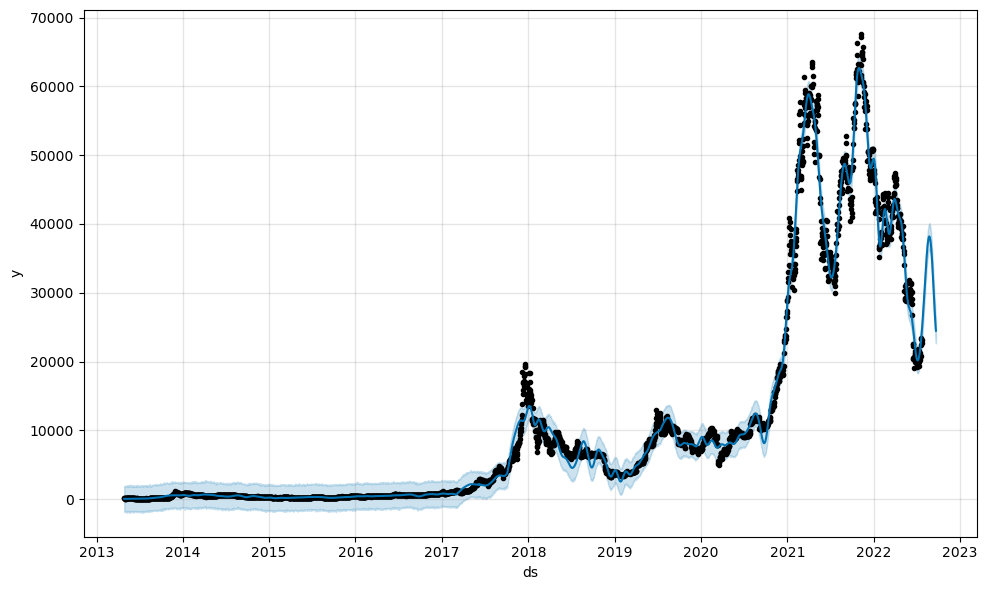

In [35]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



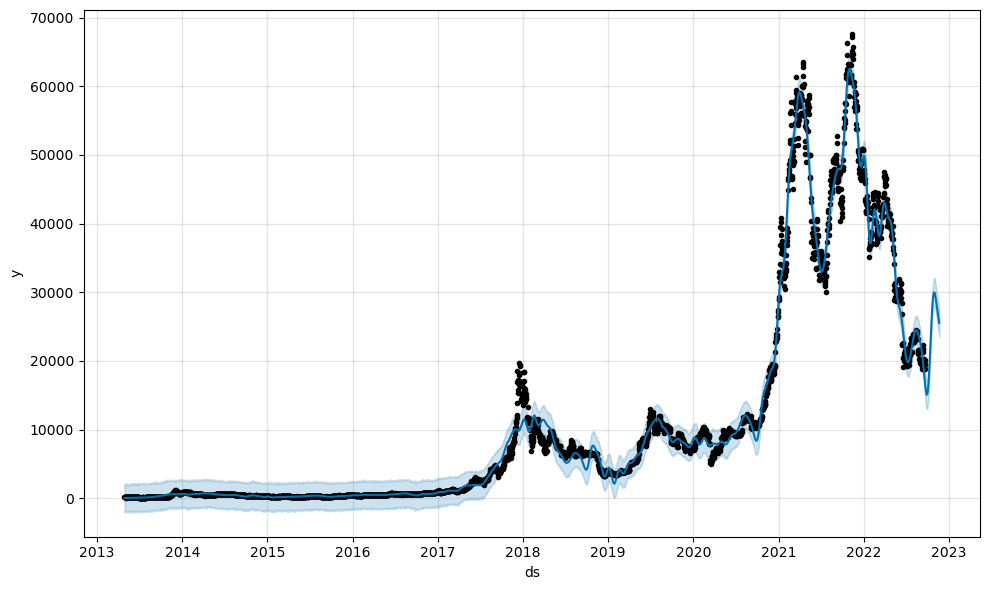

In [37]:
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(dfBTC)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=60,freq = 'D')

# to make predictions 
forecast = m.predict(future)


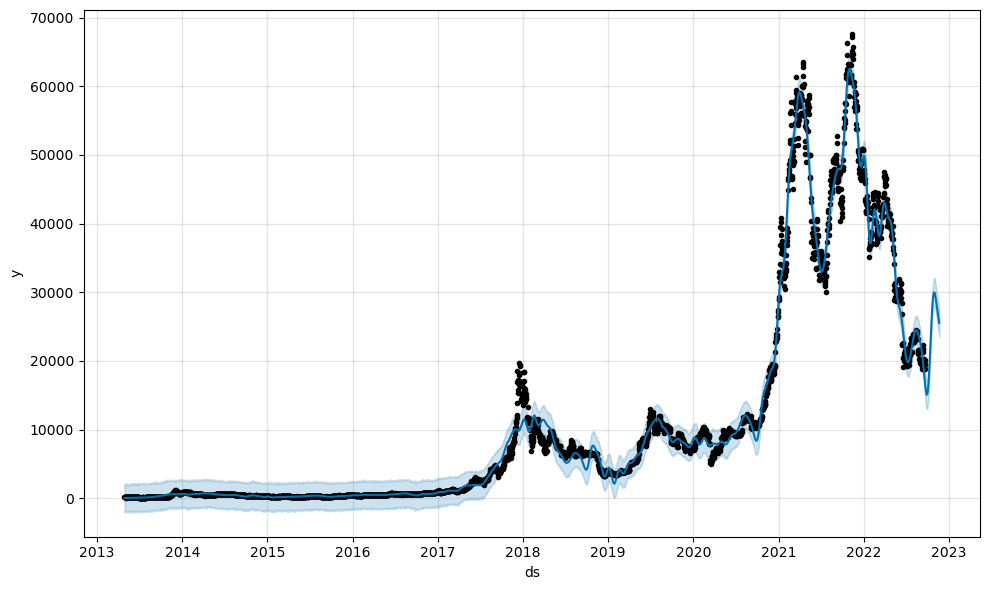

In [39]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



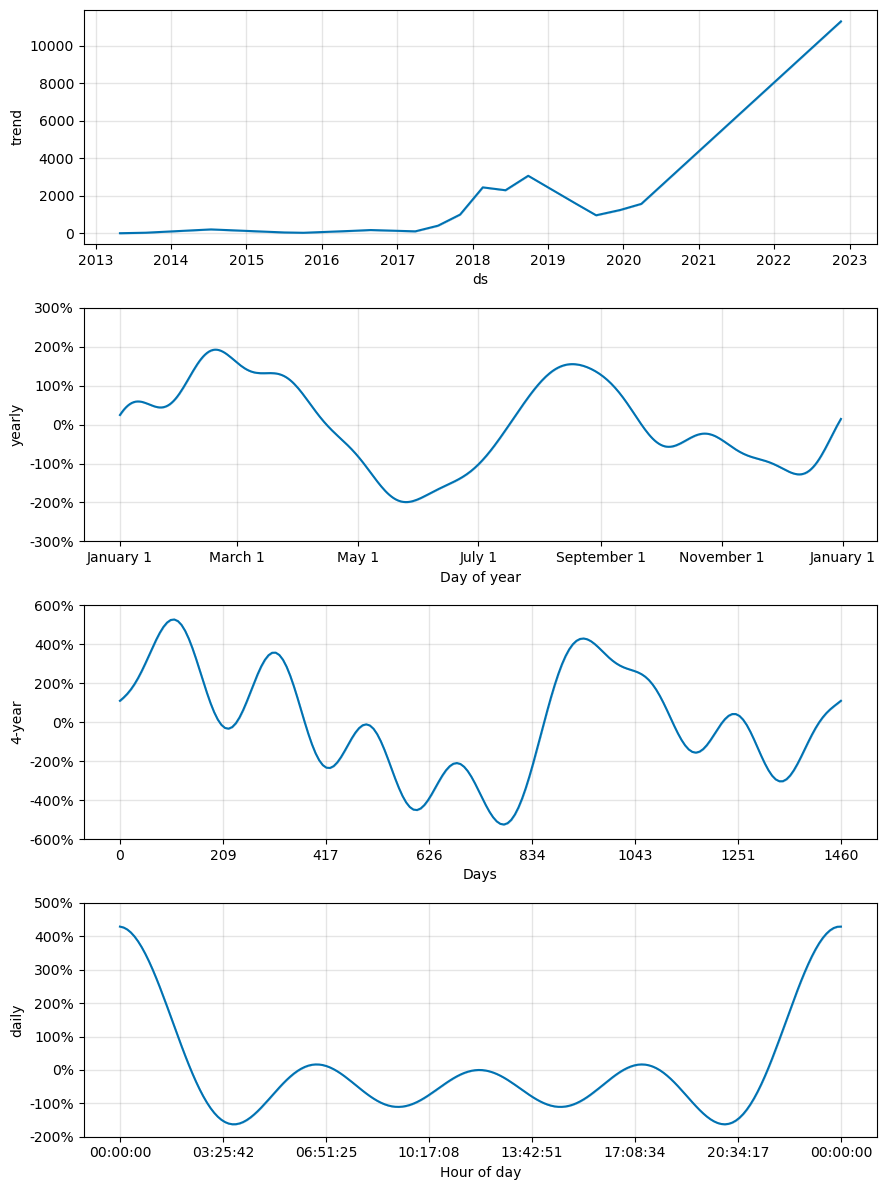

In [38]:
fig = m.plot_components(forecast)

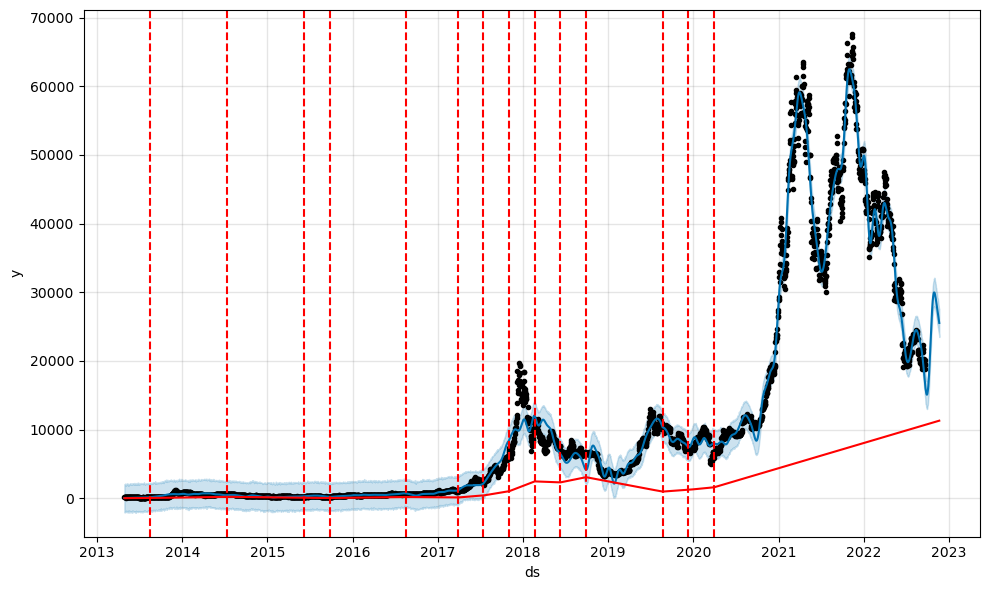

In [40]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [53]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [62]:
dfBTCActual['date'] = pd.to_datetime(dfBTCActual['Date'])
dfBTCActual = dfBTCActual.set_index('date')
dfBTCActual = dfBTCActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfBTCActual, how='outer')

In [65]:
result[['yhat', 'Close']].iplot()

In [64]:
dfBTCActual

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,-0.002078,-0.000401,0.000355,920.382019,0.285540,0.000964,0.003887,-0.046710,51.132956,1.003820,...,882.626665,0,-0.007057,0.057605,-0.002272,0.004646,0.991261,0.002001,0.004457,1.006902
2017-01-31,0.000878,0.053054,0.001615,970.403015,1.103895,0.054348,0.055442,0.005657,60.627504,1.185684,...,885.613522,1,0.011408,0.057910,0.000964,0.003887,1.003820,-0.002272,0.004646,0.991261
2017-02-01,0.054272,0.017587,0.054056,989.023010,-0.087932,0.019188,0.018926,0.025966,63.472551,1.046927,...,895.673808,2,0.007132,0.057381,0.054348,0.055442,1.185684,0.000964,0.003887,1.003820
2017-02-02,0.019630,0.024675,0.012855,1011.799988,-0.028572,0.023030,0.030816,0.049242,66.647429,1.050020,...,905.529332,3,0.008542,0.057675,0.019188,0.018926,1.046927,0.054348,0.055442,1.185684
2017-02-03,0.021676,0.020079,0.026005,1029.910034,0.380309,0.017899,0.024861,0.069494,68.957734,1.034665,...,915.335333,4,-0.079792,0.054832,0.023030,0.030816,1.050020,0.019188,0.018926,1.046927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,-0.033476,0.003682,-0.027807,18547.400391,0.260182,-0.018178,0.075686,21.451423,36.301870,0.949552,...,20044.204706,2,-0.125733,0.040995,-0.033429,0.041938,0.906138,0.006417,0.067925,1.026282
2022-09-22,-0.018878,-0.011066,0.006849,19413.550781,-0.112761,0.046699,0.056545,22.498496,43.978781,1.211474,...,20010.224237,3,-0.085071,0.041781,-0.018178,0.075686,0.949552,-0.033429,0.041938,0.906138
2022-09-23,0.047357,0.000399,0.010967,19297.638672,-0.054446,-0.005971,0.045501,22.357409,43.227946,0.982927,...,19978.217913,4,-0.084860,0.042373,0.046699,0.056545,1.211474,-0.018178,0.075686,0.949552
